<h1><p style="text-align:center">EyeAI</p></h1>
<p style="text-align:center">By: Mark John A. Velmonte</p>

<p style="text-align: justify;">EyerAi is a type of <span style="font-weight: bold;">simple</span> supervised classification deep learning AI. It classify images base on the data sets that is loaded to the program. The performance of this AI will depend on what you teach to it. It uses <span style="font-weight: bold;">neural network </span>to classify object</p>


###### dependencies
1. python3
1. pandas
1. numpy
1. sklearn
1. matplotlib

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread
from PIL import Image
from skimage.color import rgb2gray
from skimage import color
import numpy as np
import pandas as pd
import os.path 
import time
from sklearn.neural_network import MLPClassifier

In [2]:
class EyeAI():
    def __init__(self):
        print("initializing values.....")
        self.image_size = 200
    
        if os.path.isfile("EyeAI_DataSets.csv"):
            self.data_set = pd.read_csv("EyeAI_DataSets.csv")
            init_time = time.process_time()

            print("Value Initialization complete. time:", init_time)
            
        else:
            print("no data sets detected")   
        
    def imageResize(self, image):
        foo = Image.open(image)
        foo = foo.resize((self.image_size,self.image_size),Image.ANTIALIAS)
        foo.save("images/encoded_hog.jpg",optimize=True,quality=100)
    
    
    def encHog(self):
        try:
            image = imread('images/encoded_hog.jpg')
        except Exception as error:
            print(error)
            
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(12, 12), 
                            cells_per_block=(2, 2), visualize = True, multichannel = True)

        self.hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
 
    
    def plotHog(self):
        plt.imshow(self.hog_image_rescaled, cmap = "gray")
        plt.show()
        
        t = time.process_time()
        print("process time:", t)
        
    
    def saveData(self, name, n_turn):
        f_name = "EyeAI_DataSets.csv"
        n_total_turn = n_turn
        
        
        data_to_add = np.array([])
        
        data = np.array(self.hog_image_rescaled).reshape(1, self.image_size * self.image_size)
        
        turn = 0
        while turn != n_total_turn:
            
            data_to_add = np.append(data_to_add, data)
            
            turn += 1
            
            print("proccesed:", turn)
            
            if turn == n_total_turn:
                break
        
        
        data_to_add = data_to_add.reshape(n_total_turn, self.image_size * self.image_size)
        
        print("Saving New Data....")
        if os.path.isfile(f_name): 
            df = self.data_set

            latest = pd.DataFrame(data_to_add, columns = map(str, range(self.image_size * self.image_size))) 
            latest["name"] = name 
            df = pd.concat((df, latest), ignore_index = False, sort = False) 
                
            df.to_csv(f_name, index = False)
                
        else: 
            print("creating new datasets")
            df = pd.DataFrame(data_to_add, columns = map(str, range(self.image_size * self.image_size))) 
            df["name"] = name 
                
            df.to_csv(f_name, index = False)

            turn += 1
            print("complete", turn, "/" , n_total_turn)
        
        
        print("save complete")
            
    
    def showDataFrame(self, show_all_row = False, show_all_cols = False):
        if show_all_row == True:
            pd.set_option("display.max_rows", 10000)
        if show_all_cols == True:
            pd.set_option("display.max_columns", 10000)
        
        print(self.data_set)
            
    
    def teach(self):
        image_inp = input("image:")
        image_inp_name = input("name:")
        
        if os.path.isfile("EyeAI_DataSets.csv"):
            n_turn = input("turn:") 
        else:
            n_turn = 1
            
        save_status = input("add T/F:")
        
        if save_status == "T":
            self.imageResize(image_inp)
            self.encHog()
            self.saveData(image_inp_name, int(n_turn))     
            self.plotHog()
        elif save_status == "F":
            print("canceled")
        else:
            print("input error")
    
    
    def imageClassifier(self):
        image_input = input("image:")
        
        self.imageResize(image_input)
        self.encHog()
        
        enc_image_input = np.array(self.hog_image_rescaled).reshape(1, self.image_size * self.image_size)[0]
        
        X = self.data_set.iloc[:, :-1].values
        y = self.data_set["name"]
        
        model = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5,2), random_state = 1)
        model.fit(X, y)
        
        prediction = model.predict([enc_image_input])
        
        print("prediction:", prediction[0])

In [3]:
Alice = EyeAI()

initializing values.....
Value Initialization complete. time: 23.46875


image:images/mong.jpg
name:cat
turn:5
add T/F:T
proccesed: 1
proccesed: 2
proccesed: 3
proccesed: 4
proccesed: 5
Saving New Data....
save complete


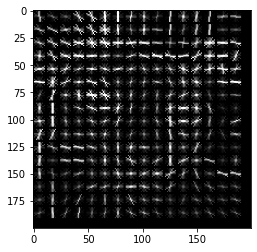

process time: 46.5


In [5]:
Alice.teach(

In [6]:
pd.read_csv("EyeAI_DataSets.csv")

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cat
